#1. Import

In [1]:
pip install bioinfokit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 86 kB 1.9 MB/s 
  Created wheel for bioinfokit: filename=bioinfokit-2.1.0-py3-none-any.whl size=58665 sha256=101650010cc294708542e20593592af2cc951ec004cc4d12719cf1aa1e64a491
  Stored in directory: /root/.cache/pip/wheels/81/e6/c8/a378f0c300eba657e42ae0df674e32e6d434d96a7eb765b067
  Created wheel for adjustText: filename=adjustText-0.7.3-py3-none-any.whl size=7097 sha256=7f70087cadd98818f0ea54a3e4f4095684bba4610e5a0fdec00b8efbab82a70e
  Stored in directory: /root/.cache/pip/wheels/2f/98/32/afbf902d8f040fadfdf0a44357e4ab750afe165d873bf5893d
Successfully built bioinfokit adjustText


In [2]:
# import des librairies
import pandas as pd
import numpy as np
from bioinfokit.analys import stat

# Pour afficher les graphiques dans la continuité du code, 
# et non pas dans une fenêtre à part:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import scipy.stats as st

#Anova
import statsmodels.formula.api as smf
import statsmodels.api as sm
import statsmodels.stats as sms

#PCA
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from matplotlib.collections import LineCollection

In [3]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [4]:
#import du dataset
df_OpenfoodfactsClean = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Freshfood_Data.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Ici il sera question de faire une analyse univariée, bivariée et multivarié de notre jeu de données

# 2. Analyse exploratoire des données



Ici il sera question de faire une analyse univariée, bivariée et multivarié de notre jeu de données

## 2.1 Analyse uni-variée

### Variable numérique

Nous étudierons les variables numériques qui composent notre jeu de données afin d'en comprendre les différentes tendances

In [5]:
#Mesures descriptives de nos données numérique
df_OpenfoodfactsClean.describe()

,additives_n,energy_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,nutrition-score-fr_100g
count,213573.000000,213573.000000,213573.000000,213573.000000,213573.000000,213573.000000,213573.000000
mean,1.882967,1062.539549,14.971226,2.727914,7.770398,1.266056,9.158349
std,2.411849,596.702770,19.770895,4.234984,8.057736,4.233302,9.048871
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-15.000000
25%,0.000000,456.000000,1.300000,0.000000,1.900000,0.100000,1.000000
50%,1.000000,1191.000000,5.000000,1.600000,5.700000,0.652780,10.000000
75%,3.000000,1713.000000,23.000000,3.600000,10.710000,1.361440,16.000000
max,31.000000,1713.000000,100.000000,100.000000,100.000000,100.000000,40.000000


A travers ce tableau, nous pouvons observer les différents chiffres clé caractéristiques de nos variables numérique

In [6]:
#Mesures de tendances centrale 

#(Médian)
median_additives = df_OpenfoodfactsClean['additives_n'].median()
median_energy = df_OpenfoodfactsClean['energy_100g'].median()
median_sugars = df_OpenfoodfactsClean['sugars_100g'].median()
median_fiber = df_OpenfoodfactsClean['fiber_100g'].median()
median_proteins = df_OpenfoodfactsClean['proteins_100g'].median()
median_salt = df_OpenfoodfactsClean['salt_100g'].median()
median_nutriscoreFr = df_OpenfoodfactsClean['nutrition-score-fr_100g'].median()

print('Médiane additives:',median_additives)
print('Médiane energy:',median_energy)
print('Médiane sugars:',median_sugars)
print('Médiane fiber:',median_fiber)
print('Médiane proteins:',median_proteins)
print('Médiane salt:',median_salt)
print('Médiane nutriscore:',median_nutriscoreFr,'\n')

#(Mode)
mode_additives = df_OpenfoodfactsClean['additives_n'].mode()
mode_energy = df_OpenfoodfactsClean['energy_100g'].mode()
mode_sugars = df_OpenfoodfactsClean['sugars_100g'].mode()
mode_fiber = df_OpenfoodfactsClean['fiber_100g'].mode()
mode_proteins = df_OpenfoodfactsClean['proteins_100g'].mode()
mode_salt = df_OpenfoodfactsClean['salt_100g'].mode()
mode_nutriscoreFr = df_OpenfoodfactsClean['nutrition-score-fr_100g'].mode()

print('Mode additives:',mode_additives)
print('Mode energy:',mode_energy)
print('Mode sugars:',mode_sugars)
print('Mode fiber:',mode_fiber)
print('Mode proteins:',mode_proteins)
print('Mode salt:',mode_salt)
print('Mode nutriscore:',mode_nutriscoreFr)

Médiane additives: 1.0
Médiane energy: 1191.0
Médiane sugars: 5.0
Médiane fiber: 1.6
Médiane proteins: 5.7
Médiane salt: 0.65278
Médiane nutriscore: 10.0 

Mode additives: 0    0
dtype: int64
Mode energy: 0    1713.0
dtype: float64
Mode sugars: 0    0.0
dtype: float64
Mode fiber: 0    0.0
dtype: float64
Mode proteins: 0    0.0
dtype: float64
Mode salt: 0    0.0
dtype: float64
Mode nutriscore: 0    0.0
dtype: float64


La médiane et le mode permettent de se rendre compte des tendences que suivent nos valeurs numériques. 

On remarque ainsi que le mode de nos variables numériques sont tous nulles à l'execption de l'énergie dont les valeurs les plus fréqentes sont entre [0 et 1713]

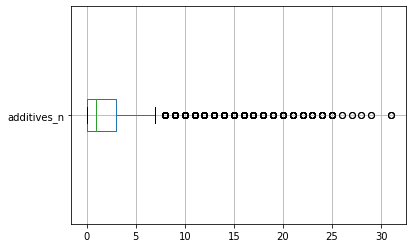

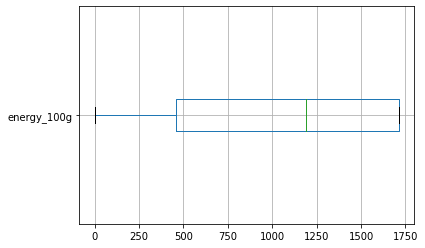

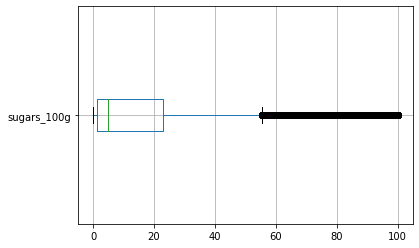

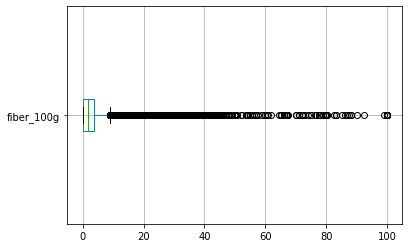

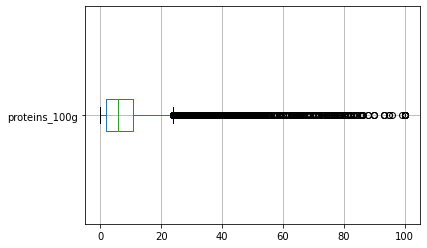

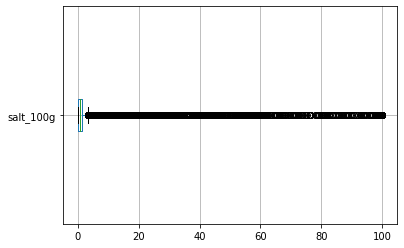

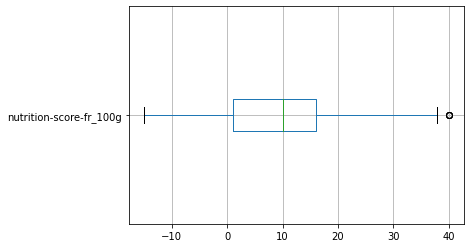

In [7]:
#  Diagrame boxplot
fig = df_OpenfoodfactsClean.boxplot(column ='additives_n', vert = False)
plt.show()

fig = df_OpenfoodfactsClean.boxplot( column= 'energy_100g', vert = False)
plt.show()

fig = df_OpenfoodfactsClean.boxplot( column= 'sugars_100g', vert = False)
plt.show()

fig = df_OpenfoodfactsClean.boxplot( column= 'fiber_100g', vert = False)
plt.show()

fig = df_OpenfoodfactsClean.boxplot( column= 'proteins_100g', vert = False)
plt.show()

fig = df_OpenfoodfactsClean.boxplot( column= 'salt_100g', vert = False)
plt.show()

fig = df_OpenfoodfactsClean.boxplot( column= 'nutrition-score-fr_100g', vert = False)
plt.show()

On remarque que la variable nutrition-score_fr_100g n'a qu'un seul outliers d'une valeur de 40 et une moyenne de 10. 

Les autres variables ont beaucoup d'outliers.Cela permet de voir qu'il  a beaucoup de données qui sortent du cadre conventionnel de nos résultats

ON remarque aussi que sles valeurs minimal et maximal des variables (energy , fiber et sugars sont confondu ) 

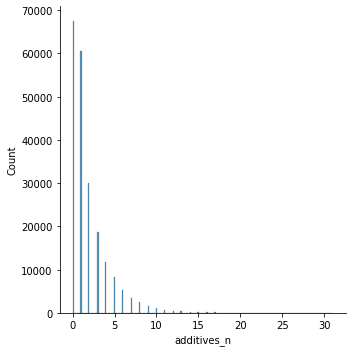

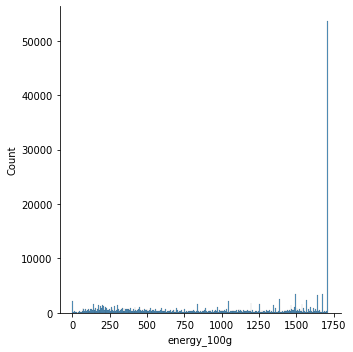

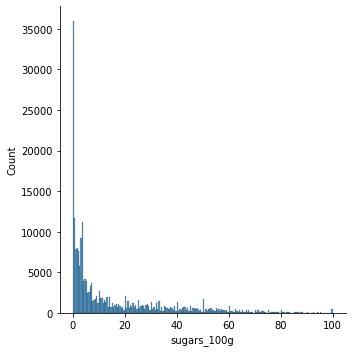

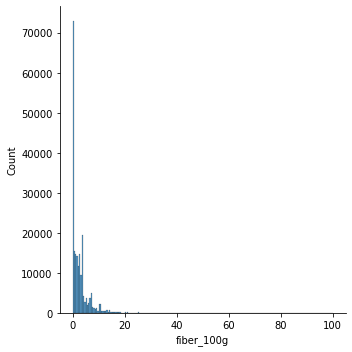

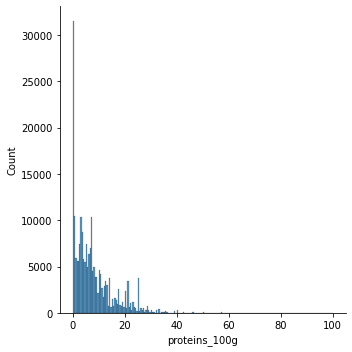

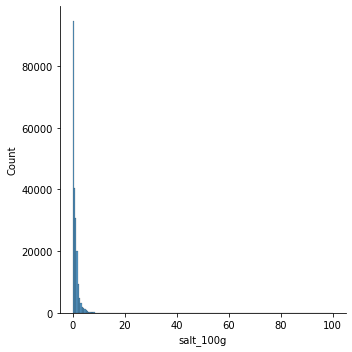

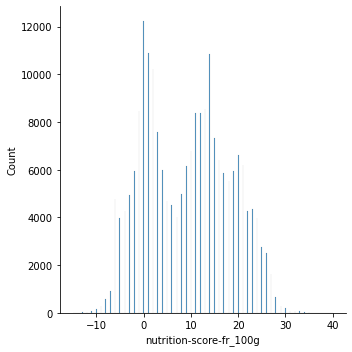

In [8]:
#Représentation des distributions

fig1= sns.displot(df_OpenfoodfactsClean , x= 'additives_n' , bins = 200)
plt.show()

fig2 = sns.displot(df_OpenfoodfactsClean, x= 'energy_100g' , bins = 300)
plt.show()

fig3 = sns.displot(df_OpenfoodfactsClean, x= 'sugars_100g', bins = 200)
plt.show()

fig6 = sns.displot(df_OpenfoodfactsClean, x= 'fiber_100g' , bins = 200)
plt.show()

fig5 = sns.displot(df_OpenfoodfactsClean, x= 'proteins_100g' , bins = 200)
plt.show()

fig6 = sns.displot(df_OpenfoodfactsClean, x= 'salt_100g' , bins = 200)
plt.show()

fig7 = sns.displot(df_OpenfoodfactsClean, x= 'nutrition-score-fr_100g' , bins = 500)
plt.show()

On construit les distributions des différentes variable afin de se rendre comptent de leur forme et aussi des information obtenues sur les différentes boxplot

On constate qu'ils suivent pour la plupart une distribution normale et tous étaler du coté droit. Mise à part la distribution de l'énergie qui est assez particulière et ne suit pas vraiment une distribution normal et le nutrisqcore qui veut ressembler presque à une distribution normale

In [9]:
#Observation des mesures de formes
#Skeweness
print('SKEWENESS')
skewness_additives = df_OpenfoodfactsClean['additives_n'].skew()
print('Skeweness additives_n: ', skewness_additives)

skewness_energy = df_OpenfoodfactsClean['energy_100g'].skew()
print('Skeweness energy_100g: ', skewness_energy)

skewness_sugars = df_OpenfoodfactsClean['sugars_100g'].skew()
print('Skeweness sugars_100g: ', skewness_sugars)

skewness_fiber = df_OpenfoodfactsClean['fiber_100g'].skew()
print('Skeweness fiber_100g: ',skewness_fiber)

skewness_proteins = df_OpenfoodfactsClean['proteins_100g'].skew()
print('Skeweness proteins_100g: ',skewness_proteins)

skewness_salt = df_OpenfoodfactsClean['salt_100g'].skew()
print('Skeweness salt_100g: ',skewness_salt)

skewness_nutriscore = df_OpenfoodfactsClean['nutrition-score-fr_100g'].skew()
print('Skeweness nutriscore: ',skewness_nutriscore)

print(' ')
print('KURTOSIS')
#kurtosis
kurtosis_additives = df_OpenfoodfactsClean['additives_n'].skew()
print('Kurtosis additives_n: ', kurtosis_additives)

kurtosis_energy = df_OpenfoodfactsClean['energy_100g'].kurtosis()
print('Kurtosis energy_100g: ', kurtosis_energy)

kurtosis_sugars = df_OpenfoodfactsClean['sugars_100g'].kurtosis()
print('Kurtosis sugars_100g:', kurtosis_sugars)

kurtosis_fiber = df_OpenfoodfactsClean['fiber_100g'].kurtosis()
print('Kurtosis: fiber_100g:', kurtosis_fiber)

kurtosis_proteins = df_OpenfoodfactsClean['proteins_100g'].kurtosis()
print('Kurtosis proteins_100g:', kurtosis_proteins)

kurtosis_salt = df_OpenfoodfactsClean['salt_100g'].kurtosis()
print('Kurtosis salt_100g:', kurtosis_salt)

kurtosis_nutriscore = df_OpenfoodfactsClean['nutrition-score-fr_100g'].kurtosis()
print('Kurtosis nutriscore', kurtosis_nutriscore)

SKEWENESS
Skeweness additives_n:  2.4752143605762527
Skeweness energy_100g:  -0.32844270549159854
Skeweness sugars_100g:  1.6625506595652972
Skeweness fiber_100g:  5.245456729205218
Skeweness proteins_100g:  2.0158661090180203
Skeweness salt_100g:  15.338440426126368
Skeweness nutriscore:  0.11428750335001028
 
KURTOSIS
Kurtosis additives_n:  2.4752143605762527
Kurtosis energy_100g:  -1.450787655015801
Kurtosis sugars_100g: 2.2769465472761654
Kurtosis: fiber_100g: 56.52876063897298
Kurtosis proteins_100g: 7.7791081082611555
Kurtosis salt_100g: 292.6172235263167
Kurtosis nutriscore -1.0153453401177073


- Le skeweness et le kurtosis des variables additives_n, sugars_100g, fiber_100g, proteins_100g et salt_100g sont supérieure à 0 donc nos distributions de ces variables sont étalée à droite (à cause du skeweness) et sons moins applatique par rapport à la distribution normale (à cause du kurtosis). Cela confirme nos graphs des distribution réalisées.

- Le skeweness du nitriscore est légèrement supérieure à 0 donc il est étalé à droite.
Par contre son kurtosis est inférieur à 0 cela prouve une distribution plus applati que la distribution normal

- Le skeweness et le kurtosis de la variable energy sont inférieur à 0 cette distribution est don étalé du coté gauche et plus aplati.

Cette calcul confirme mathématiquement notre remarque précédente 

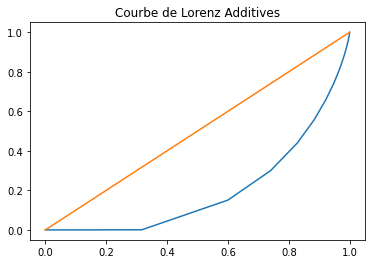

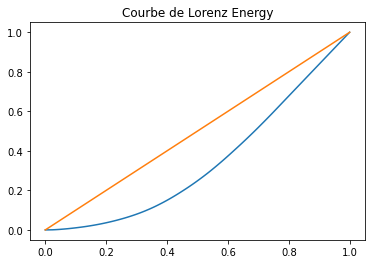

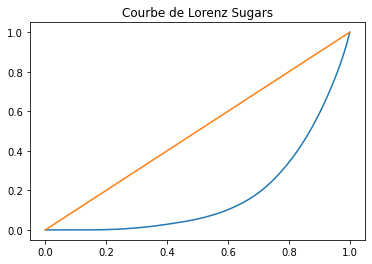

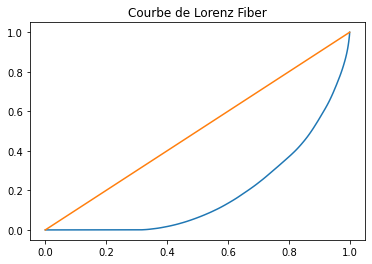

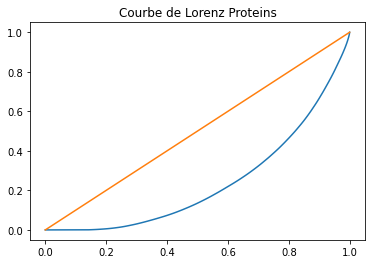

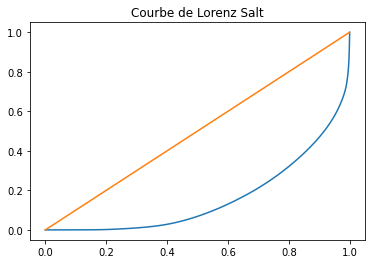

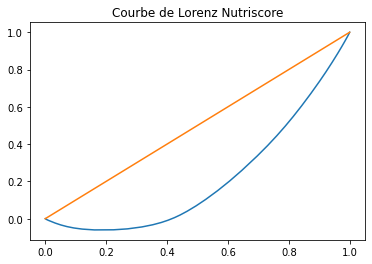

In [10]:
#Etude des mesures de concentration

#Courbe de Lorenz

val_addictives = df_OpenfoodfactsClean['additives_n'].values
val_energy = df_OpenfoodfactsClean['energy_100g'].values
val_sugars = df_OpenfoodfactsClean['sugars_100g'].values
val_fiber = df_OpenfoodfactsClean['fiber_100g'].values
val_proteins = df_OpenfoodfactsClean['proteins_100g'].values
val_salt = df_OpenfoodfactsClean['salt_100g'].values
val_nutriscore = df_OpenfoodfactsClean['nutrition-score-fr_100g'].values

tableDonneNumerique = [val_addictives ,val_energy, val_sugars, val_fiber, val_proteins, val_salt, val_nutriscore]

for i in tableDonneNumerique:
  n = len(i)
  lorenz = np.cumsum(np.sort(i)) / i.sum()
  lorenz = np.append([0],lorenz) # La courbe de Lorenz commence à 0
  xaxis = np.linspace(0-1/n,1+1/n,n+1) #Il y a un segment de taille n pour chaque individu, plus 1 segment supplémentaire d'ordonnée 0. Le premier segment commence à 0-1/n, et le dernier termine à 1+1/n.
  def plotter():
    plt.plot(xaxis,lorenz,drawstyle='steps-post')
    plt.plot([0,1])
    if i is val_addictives:
      plt.title('Courbe de Lorenz Additives')
    elif i is val_energy:
      plt.title('Courbe de Lorenz Energy')
    elif i is val_sugars:
      plt.title('Courbe de Lorenz Sugars')
    elif i is val_fiber:
      plt.title('Courbe de Lorenz Fiber')
    elif i is val_proteins:
      plt.title('Courbe de Lorenz Proteins')
    elif i is val_salt:
      plt.title('Courbe de Lorenz Salt')
    elif i is val_nutriscore:
      plt.title('Courbe de Lorenz Nutriscore')
    plt.show()
  plotter()

La courbe de Lorenz permet de se rendre compte de la répartition des variable sur les individus dans la distribution. ON peut en conclure que seul le variable energyu est plutot bien répartie sur les individus même si ce dernier n'a pas une répartion égalitaire.

Il est possible de mesuré l'indice  de Gini pour quantifier cette répartition , mais cela ne se fera pas ici.

###Variable catégorielle

On étudie ici les variables catégorielle

In [11]:
df_OpenfoodfactsClean.dtypes

code                        object
url                         object
created_datetime            object
last_modified_datetime      object
product_name                object
brands                      object
ingredients_text            object
additives_n                  int64
additives                   object
nutrition_grade_fr          object
energy_100g                float64
sugars_100g                float64
fiber_100g                 float64
proteins_100g              float64
salt_100g                  float64
nutrition-score-fr_100g    float64
categories                  object
dtype: object

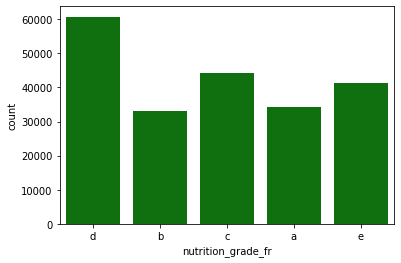

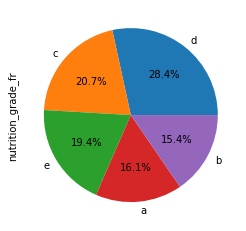

In [12]:
#Barplot
fig1 = sns.countplot(x = 'nutrition_grade_fr', data = df_OpenfoodfactsClean, color ='green')
plt.show()

fig = df_OpenfoodfactsClean['nutrition_grade_fr'].value_counts().plot(kind = 'pie',autopct='%1.1f%%')
plt.show()

Les graphiques permet d'observer les proportions de nutri grade dans notre dataset. On remarque que 28,4 % des individus ont un nutritrion grade qui est égale à d. le nutrition grade "D" est le plus dominant

In [13]:
len(df_OpenfoodfactsClean['brands'].unique())

39955

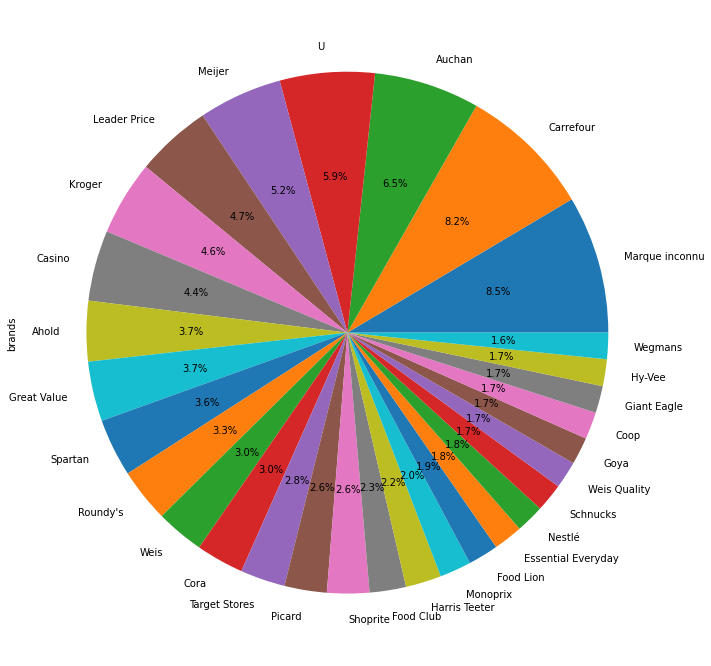

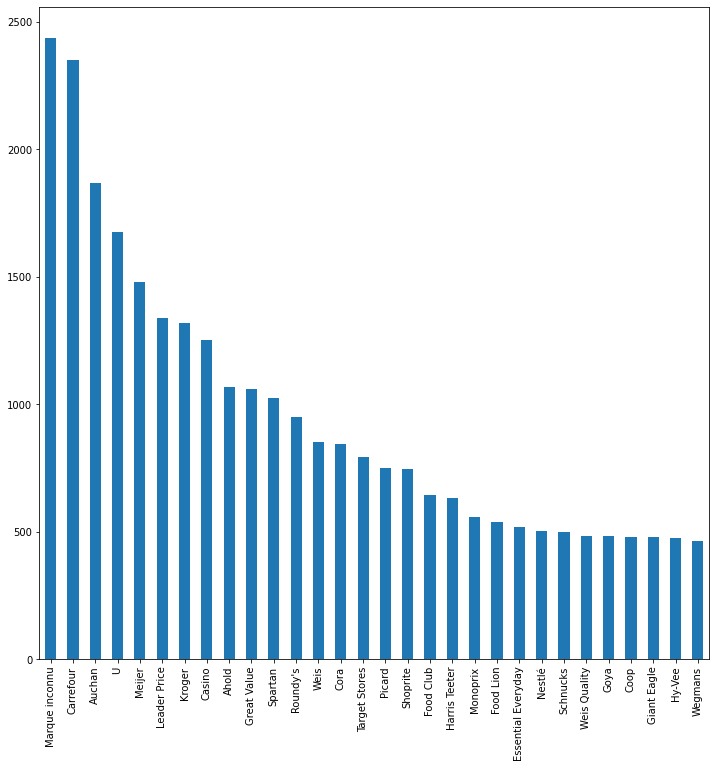

In [14]:
#Cammenbert sur les 30 marques les plus dominant
plt.figure(figsize=(12,12))
fig =df_OpenfoodfactsClean['brands'].value_counts().sort_values(ascending = False ).head(30).plot(kind='pie', autopct='%1.1f%%')
plt.show()

plt.figure(figsize=(12,12))
fig = df_OpenfoodfactsClean['brands'].value_counts().sort_values(ascending = False ).head(30).plot(kind='bar')
plt.show()

ON remarque de ces graphique que beaucoup de nos produits sotn sans marques et que la deuxième marque la plus dominant est celui de Carrefour

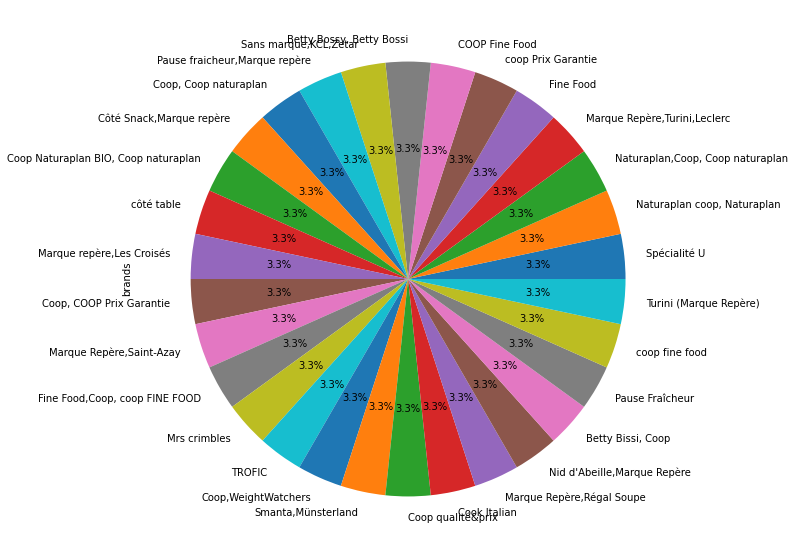

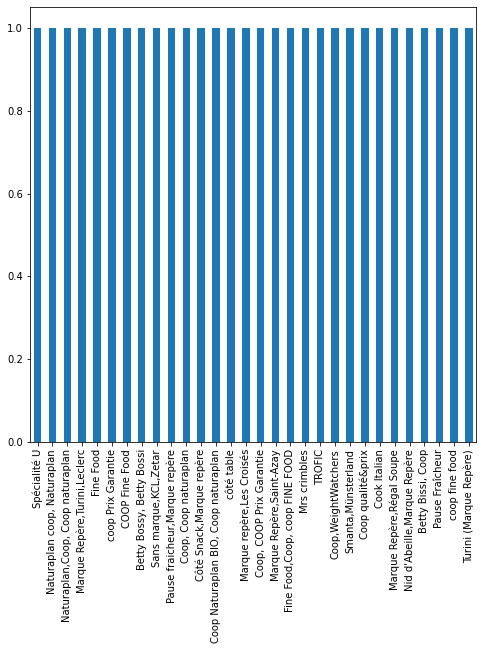

In [15]:
#Cammenbert sur les marque les moins dominantes
plt.figure(figsize=(10,10))
df_OpenfoodfactsClean['brands'].value_counts().sort_values(ascending = True ).head(30).plot(kind='pie', autopct='%1.1f%%')

plt.figure(figsize=(8,8))
fig = df_OpenfoodfactsClean['brands'].value_counts().sort_values(ascending = True ).head(30).plot(kind='bar')
plt.show()

On peut déduire alors que tout les marques présente dans notre dataset on au moins un produit

##2.2 Analyse bi-variée

###Variable numérique VS Variable numérique

ON fera une étude en deux dimenision des variable numériue pour observés si il y a une répartition des individus entre celle-ci

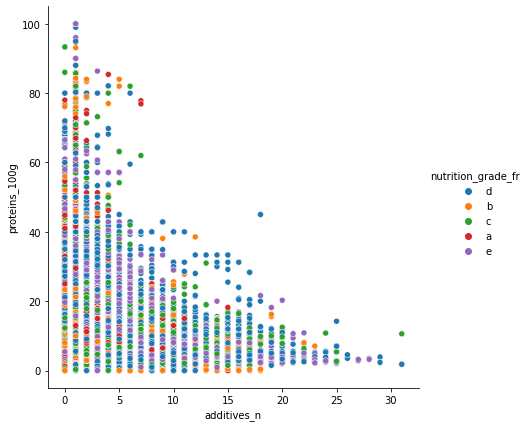

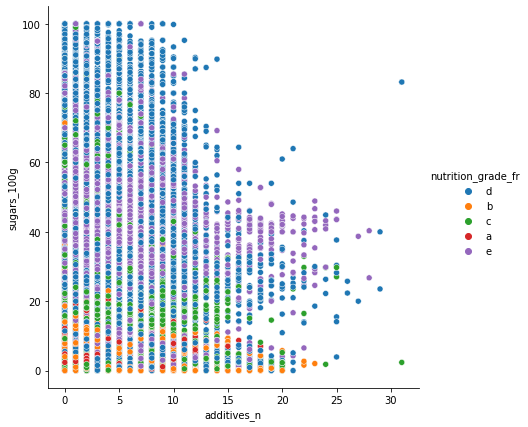

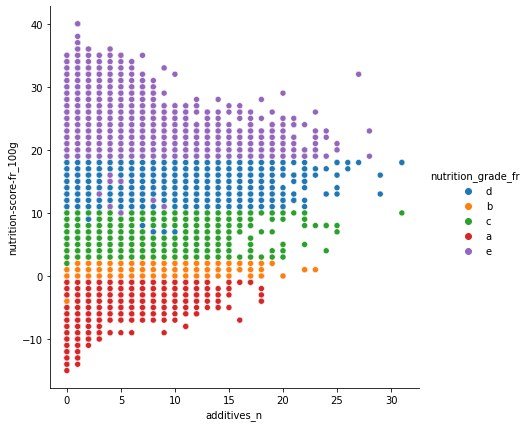

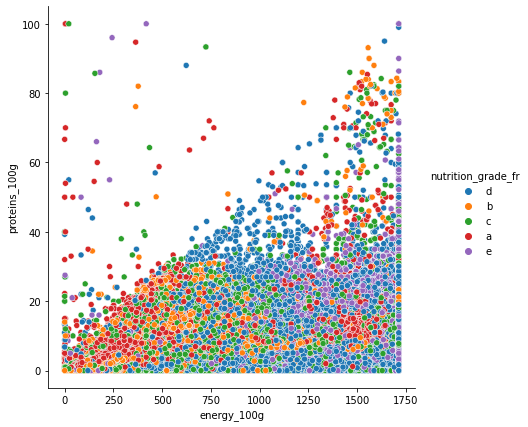

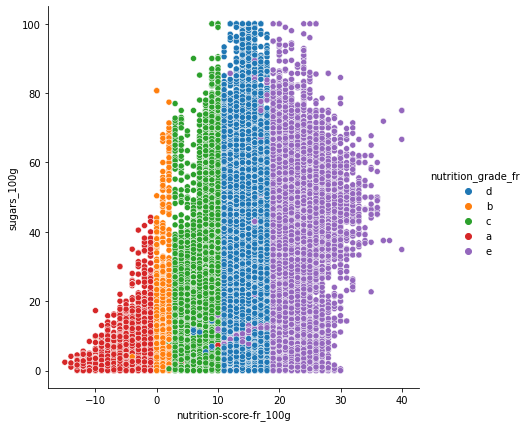

In [16]:
#Confrontation des variables numérique

fig = sns.pairplot(df_OpenfoodfactsClean, x_vars = 'additives_n', y_vars = 'proteins_100g', hue ='nutrition_grade_fr', height=6)
plt.show()

fig = sns.pairplot(df_OpenfoodfactsClean, x_vars = 'additives_n', y_vars = 'sugars_100g', hue ='nutrition_grade_fr', height=6)
plt.show()


fig = sns.pairplot(df_OpenfoodfactsClean, x_vars = 'additives_n', y_vars = 'nutrition-score-fr_100g', hue ='nutrition_grade_fr', height=6)
plt.show()

fig = sns.pairplot(df_OpenfoodfactsClean, x_vars = 'energy_100g', y_vars = 'proteins_100g', hue ='nutrition_grade_fr', height=6)
plt.show()

fig = sns.pairplot(df_OpenfoodfactsClean, y_vars = 'sugars_100g', x_vars = 'nutrition-score-fr_100g', hue ='nutrition_grade_fr', height=6)
plt.show()

On peut dire de ces graphique que: 
- Plus on a d'additives dans un produit, moins ce produit sera protéiné
- le nombre d'additives n'influencent pas grandement le nutriscore et par analogie le nutrition grade
- Plus le nonbre d'addictives augment plus on a tendence à se raprochez du nutriscore médiane

In [17]:
#Coefficient de corrélation linéaire r = R^2
print(st.pearsonr(df_OpenfoodfactsClean["additives_n"],df_OpenfoodfactsClean["proteins_100g"])[0])
print(st.pearsonr(df_OpenfoodfactsClean["additives_n"],df_OpenfoodfactsClean["energy_100g"])[0])
print(st.pearsonr(df_OpenfoodfactsClean["additives_n"],df_OpenfoodfactsClean["fiber_100g"])[0])
print(st.pearsonr(df_OpenfoodfactsClean["additives_n"],df_OpenfoodfactsClean["proteins_100g"])[0])
print(st.pearsonr(df_OpenfoodfactsClean["proteins_100g"],df_OpenfoodfactsClean["salt_100g"])[0])
print(st.pearsonr(df_OpenfoodfactsClean["proteins_100g"],df_OpenfoodfactsClean["sugars_100g"])[0])
print(st.pearsonr(df_OpenfoodfactsClean["salt_100g"],df_OpenfoodfactsClean["energy_100g"])[0])
print(st.pearsonr(df_OpenfoodfactsClean["salt_100g"],df_OpenfoodfactsClean["fiber_100g"])[0])


print(st.pearsonr(df_OpenfoodfactsClean["additives_n"],df_OpenfoodfactsClean["sugars_100g"])[0])
print(st.pearsonr(df_OpenfoodfactsClean["proteins_100g"],df_OpenfoodfactsClean["energy_100g"])[0])
print(st.pearsonr(df_OpenfoodfactsClean["proteins_100g"],df_OpenfoodfactsClean["fiber_100g"])[0])
print(st.pearsonr(df_OpenfoodfactsClean["salt_100g"],df_OpenfoodfactsClean["sugars_100g"])[0])
print(st.pearsonr(df_OpenfoodfactsClean["sugars_100g"],df_OpenfoodfactsClean["energy_100g"])[0])
print(st.pearsonr(df_OpenfoodfactsClean["sugars_100g"],df_OpenfoodfactsClean["fiber_100g"])[0])
print(st.pearsonr(df_OpenfoodfactsClean["energy_100g"],df_OpenfoodfactsClean["fiber_100g"])[0])

print(st.pearsonr(df_OpenfoodfactsClean["nutrition-score-fr_100g"],df_OpenfoodfactsClean["energy_100g"])[0])
print(st.pearsonr(df_OpenfoodfactsClean["salt_100g"],df_OpenfoodfactsClean["fiber_100g"])[0])

-0.09918222888642286
0.07156371568704159
-0.12163245175930464
-0.09918222888642286
0.05308451426426261
-0.2660810238527278
-0.02538695704106591
-0.019769317722118318
0.14123298973500129
0.31612436394205645
0.20579217844256845
-0.08937482055998922
0.3863644361081887
0.000625730760788732
0.26414050435864045
0.6344235646249832
-0.019769317722118318


ON remarque que mes variable numérique sont très peu corrélé entre elle. Si une corrélation existe elle n'est pas linéaire. Le heatmap permet de se rendre compte des différents coeficient de corrélation qui n'ont pas  été calculé ici


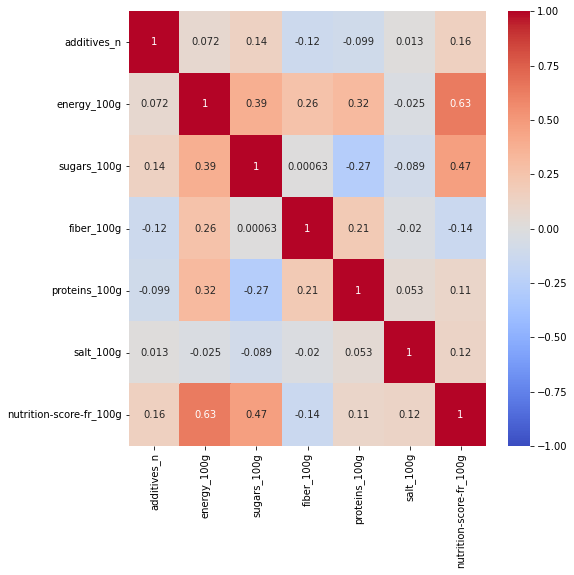

In [18]:
#heatmap de corrélation r
plt.figure(figsize=(8,8))
fig = sns.heatmap(df_OpenfoodfactsClean.corr(), vmin = -1, vmax = +1, annot = True, cmap = 'coolwarm')
plt.show()

#– Si -1 inférieur à r inférieur à 0 : forte relation linéaire négative entre x et y
#– Si r = 0 : abscence de relation linéaire entre x et y
#– Si 0 inférieur à r inférieur à 1 : forte relation linéaire positive entre x et y

Au travers de ce diagramme on peut voir les différents variable qui ont une bonne corréllation. 

ON note ainsi qu'il y a une légère corrélation dans le sens positif (Lorque l'un augmente l'autre augmente aussi) entre les variables:
- Le taux de energy et  le nutriscore

- Le taux de sucre et le nutriscore

On aussi que dans les autre cas de corrélation des entre les variables, la corrélation peut exister mais celui-ci n'est pas linéaire

###Numérique VS Catégorielle

In [19]:
df_OpenfoodfactsClean.dtypes

code                        object
url                         object
created_datetime            object
last_modified_datetime      object
product_name                object
brands                      object
ingredients_text            object
additives_n                  int64
additives                   object
nutrition_grade_fr          object
energy_100g                float64
sugars_100g                float64
fiber_100g                 float64
proteins_100g              float64
salt_100g                  float64
nutrition-score-fr_100g    float64
categories                  object
dtype: object

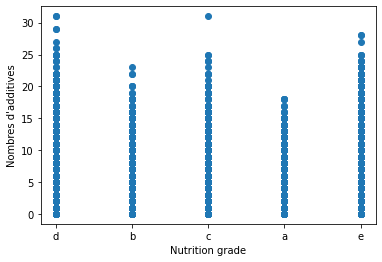

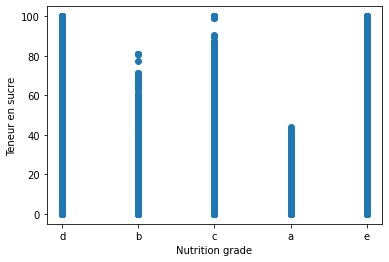

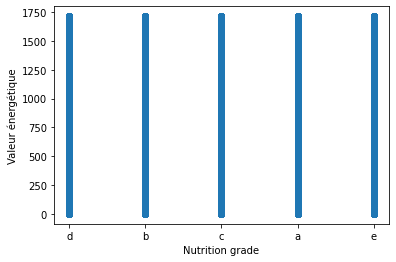

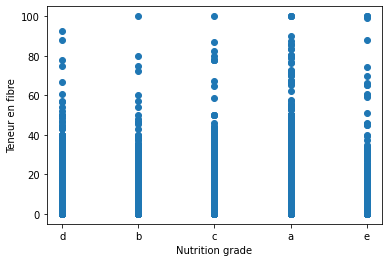

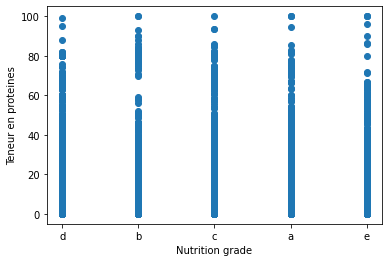

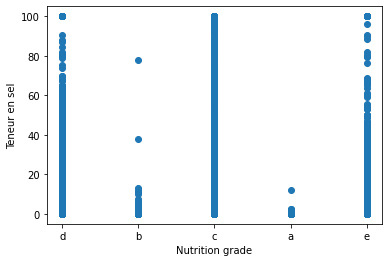

In [20]:
# Etude du rapport entre en le "nutrition_grade_fr" et "additives_n"
#plt.plot(df_OpenfoodfactsClean['nutrition_grade_fr'],df_OpenfoodfactsClean['additives_n'],'o')
fig = plt.scatter(x = df_OpenfoodfactsClean['nutrition_grade_fr'] , y = df_OpenfoodfactsClean['additives_n'] )
plt.xlabel('Nutrition grade')
plt.ylabel('Nombres d\'additives')
plt.show()

fig = plt.scatter(x = df_OpenfoodfactsClean['nutrition_grade_fr'] , y = df_OpenfoodfactsClean['sugars_100g'] )
plt.xlabel('Nutrition grade')
plt.ylabel('Teneur en sucre')
plt.show()

fig = plt.scatter(x = df_OpenfoodfactsClean['nutrition_grade_fr'] , y = df_OpenfoodfactsClean['energy_100g'] )
plt.xlabel('Nutrition grade')
plt.ylabel('Valeur énergétique')
plt.show()

fig = plt.scatter(x = df_OpenfoodfactsClean['nutrition_grade_fr'] , y = df_OpenfoodfactsClean['fiber_100g'] )
plt.xlabel('Nutrition grade')
plt.ylabel('Teneur en fibre')
plt.show()

fig = plt.scatter(x = df_OpenfoodfactsClean['nutrition_grade_fr'] , y = df_OpenfoodfactsClean['proteins_100g'] )
plt.xlabel('Nutrition grade')
plt.ylabel('Teneur en proteines')
plt.show()

fig = plt.scatter(x = df_OpenfoodfactsClean['nutrition_grade_fr'] , y = df_OpenfoodfactsClean['salt_100g'] )
plt.xlabel('Nutrition grade')
plt.ylabel('Teneur en sel')
plt.show()

On remarque que que les individus ayant dans la catégorie des nutrition grade ( c, d) sont ceux qui peuvent avoir un nombre d'additives supérieure à 25.
tandis que pour avoir des produits ayant moins de 20 additives il faut chercher des produit ayant un nutrition grade (A,B).

Pour notre application on pourrait dire que les produit ayant un nutrition grade (A, B) seront les plus proposées à nos utilisateurs

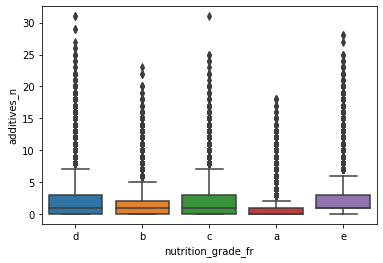

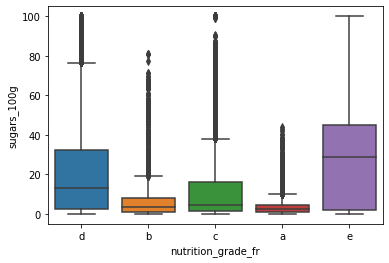

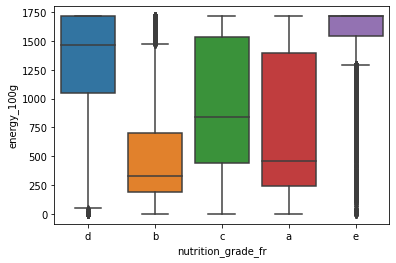

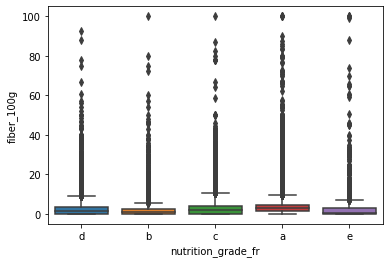

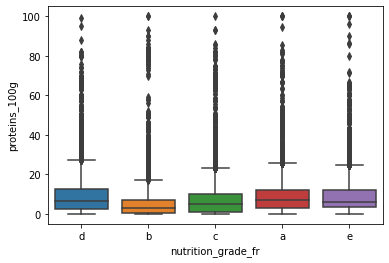

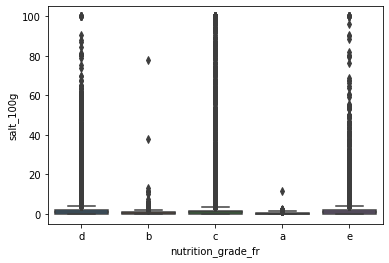

In [21]:
fig = sns.boxplot(  x = 'nutrition_grade_fr', y= 'additives_n' , data = df_OpenfoodfactsClean)
plt.show()

fig = sns.boxplot(  x = 'nutrition_grade_fr', y= 'sugars_100g' , data = df_OpenfoodfactsClean)
plt.show()

fig = sns.boxplot(  x = 'nutrition_grade_fr', y= 'energy_100g' , data = df_OpenfoodfactsClean)
plt.show()

fig = sns.boxplot(  x = 'nutrition_grade_fr', y= 'fiber_100g' , data = df_OpenfoodfactsClean)
plt.show()

fig = sns.boxplot(  x = 'nutrition_grade_fr', y= 'proteins_100g' , data = df_OpenfoodfactsClean)
plt.show()

fig = sns.boxplot(  x = 'nutrition_grade_fr', y= 'salt_100g' , data = df_OpenfoodfactsClean)
plt.show()

Les boxplot confirment les graphique précédelment réalisées

## 2.3 Analyse multivariée






### ACP Analyse par composant principale

Préparation des données pour l'ACP

Pour cela nous allons creer 3 tableau. 

1- le tableau X des valeurs numériques à étudier

2- le tableaux names des noms des différents individus

3- le tabelauxdes colonnes qui ne sont rien d'autres que les vairable de notre dataframe.

In [22]:
#Séparation des matrices de données
#ON supprime les données qui ne sont pas numérique
donne_pca = df_OpenfoodfactsClean.drop(['code',
                                        'url',
                                        'created_datetime',
                                        'last_modified_datetime',
                                        'product_name',
                                        'brands',   
                                        'ingredients_text',
                                        'additives',
                                        'categories',
                                        'nutrition_grade_fr'], axis = 1)
X = donne_pca.values
names = df_OpenfoodfactsClean['product_name'].values
features = donne_pca.columns

In [23]:
names

array(['Banana Chips Sweetened (Whole)', 'Peanuts',
       'Organic Salted Nut Mix', ..., 'Amandes', 'Thé vert Earl grey',
       'Mint Melange Tea A Blend Of Peppermint, Lemon Grass And Spearmint'],
      dtype=object)

In [24]:
X.shape

(213573, 7)

In [25]:
scaler = StandardScaler()

In [26]:
# ON transforme notre matrice 
X_scaled = scaler.fit_transform(X)

In [27]:
idx = ["mean", "std"]

pd.DataFrame(X_scaled).describe().round(2).loc[idx, :]

,0,1,2,3,4,5,6
mean,-0.0,0.0,-0.0,0.0,0.0,0.0,0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0


Analyse ACP

Ayant 7 variables nous disposont donc de 7 composantes principales

In [28]:
n_components = 7
pca = PCA(n_components = n_components)
pca.fit(X_scaled)

PCA(n_components=7)

In [29]:
#On s'interesse au ratio des composantes 
pca.explained_variance_ratio_

array([0.29412772, 0.21205037, 0.15704301, 0.127913  , 0.12135571,
       0.0536278 , 0.03388238])

In [30]:
#Tableau récapitulatif de l'inertie (en %) des composantes principales de notre distribution
scree = (pca.explained_variance_ratio_*100).round(2)
scree

array([29.41, 21.21, 15.7 , 12.79, 12.14,  5.36,  3.39])

On observe que l'inertie est plutot bien répartie suivant les 5 premières  composantes principales.

In [31]:
#ON réalise une somme cumulées des variances des composantes
scree_cum = scree.cumsum().round()
print(scree_cum)

# n range les somme dans une liste
x_list = range(1, n_components+1)
list(x_list)

[ 29.  51.  66.  79.  91.  97. 100.]


[1, 2, 3, 4, 5, 6, 7]

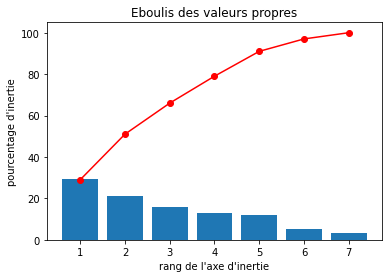

In [32]:
#Réalisation du graphique Ebouli des valeurs propres
plt.bar(x_list, scree)
plt.plot(x_list, scree_cum,c="red",marker='o')
plt.xlabel("rang de l'axe d'inertie")
plt.ylabel("pourcentage d'inertie")
plt.title("Eboulis des valeurs propres")
plt.show(block=False)

L'ébouli permet de voir que que la vairances est répartie sur les différentes composantes. Ce qui nous obligeras à étudier nos données sur plusieurs composantes.
 Les 4 premières composantes captent 29.41 + 21.21 + 15.7 + 12.79 = 79,11 % de l'inertie totale

 Ainsi notre étude se fera d'abord  sur les 4 premières composantes

In [33]:
#ON s'interesse au composantes
pcs = pca.components_
pcs = pd.DataFrame(pcs)
pcs

,0,1,2,3,4,5,6
0,0.172731,0.600462,0.476564,0.076231,0.120868,0.020831,0.601367
1,-0.349241,0.260973,-0.340858,0.522788,0.639017,0.067008,-0.087175
2,0.200913,-0.067994,-0.297318,-0.384266,0.241126,0.782868,0.218926
3,-0.770976,-0.037968,0.284147,0.081446,-0.354979,0.429324,0.080333
4,0.461128,-0.035145,0.127051,0.674196,-0.293530,0.414992,-0.238884
5,0.027745,-0.333382,0.685484,-0.100177,0.545370,0.096195,-0.318560
6,0.004059,-0.672975,-0.039173,0.319395,0.096475,-0.128073,0.646398


In [34]:
# Voici ceux à quoi ressemble nos différentes composantes  principales
pcs.columns = features
pcs.index = [f"F{i}" for i in x_list]
pcs.round(2)

,additives_n,energy_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,nutrition-score-fr_100g
F1,0.17,0.60,0.48,0.08,0.12,0.02,0.60
F2,-0.35,0.26,-0.34,0.52,0.64,0.07,-0.09
F3,0.20,-0.07,-0.30,-0.38,0.24,0.78,0.22
F4,-0.77,-0.04,0.28,0.08,-0.35,0.43,0.08
F5,0.46,-0.04,0.13,0.67,-0.29,0.41,-0.24
F6,0.03,-0.33,0.69,-0.10,0.55,0.10,-0.32
F7,0.00,-0.67,-0.04,0.32,0.10,-0.13,0.65


Ce tableau permet de modélisées les composant synthétisées

F1 = 0.17*additives_n + 0.60*energy_100g + 0.48sugars_100g + 0.08*fiber_100g -0.12*proteins_100g + 0.02*salt_100g + 0.60*nutrition-score-fr_100g
Ainsi de suite

In [35]:
#Affichage 
pcs.T

,F1,F2,F3,F4,F5,F6,F7
additives_n,0.172731,-0.349241,0.200913,-0.770976,0.461128,0.027745,0.004059
energy_100g,0.600462,0.260973,-0.067994,-0.037968,-0.035145,-0.333382,-0.672975
sugars_100g,0.476564,-0.340858,-0.297318,0.284147,0.127051,0.685484,-0.039173
fiber_100g,0.076231,0.522788,-0.384266,0.081446,0.674196,-0.100177,0.319395
proteins_100g,0.120868,0.639017,0.241126,-0.354979,-0.293530,0.545370,0.096475
salt_100g,0.020831,0.067008,0.782868,0.429324,0.414992,0.096195,-0.128073
nutrition-score-fr_100g,0.601367,-0.087175,0.218926,0.080333,-0.238884,-0.318560,0.646398


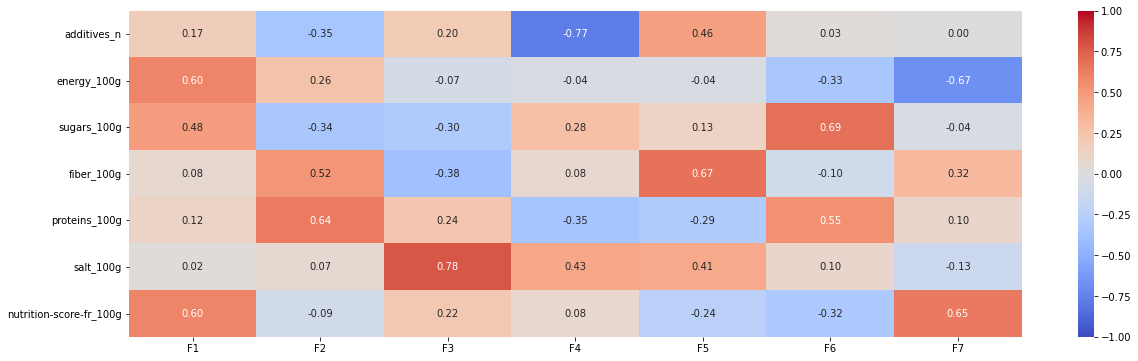

In [36]:
# Heatmap
fig, ax = plt.subplots(figsize=(20, 6))
sns.heatmap(pcs.T, vmin=-1, vmax=1, annot=True, cmap="coolwarm", fmt="0.2f")

#### Graphique de corrélation

Nous réaliserons maintenant le graphique des corrélations par la projection des variables sur les différentes composantes principales synthétisés

In [37]:
#Function pour le graph des corrélations
def correlation_graph(pca,
                      x_y,
                      features):
    """Affiche le graphe des correlations

    Positional arguments :
    -----------------------------------
    pca : sklearn.decomposition.PCA : notre objet PCA qui a été fit
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2
    features : list ou tuple : la liste des features (ie des dimensions) à représenter
    """

    # Extrait x et y 
    x, y= x_y

    # Taille de l'image (en inches)
    fig, ax = plt.subplots(figsize=(10, 9))

    # Pour chaque composante : 
    for i in range(0, pca.components_.shape[1]):

        # Les flèches
        ax.arrow(0,0, 
                pca.components_[0, i],  
                pca.components_[1, i],  
                head_width=0.07,
                head_length=0.07, 
                width=0.02, )

        # Les labels
        plt.text(pca.components_[0, i] + 0.05,
                pca.components_[1, i] + 0.05,
                features[i])
        
    # Affichage des lignes horizontales et verticales
    plt.plot([-1, 1], [0, 0], color='grey', ls='--')
    plt.plot([0, 0], [-1, 1], color='grey', ls='--')

    # Nom des axes, avec le pourcentage d'inertie expliqué
    plt.xlabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
    plt.ylabel('F{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[y],1)))

    # J'ai copié collé le code sans le lire
    plt.title("Cercle des corrélations (F{} et F{})".format(x+1, y+1))

    # Le cercle 
    an = np.linspace(0, 2 * np.pi, 100)
    plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale

    # Axes et display
    plt.axis('equal')
    plt.show(block=False)

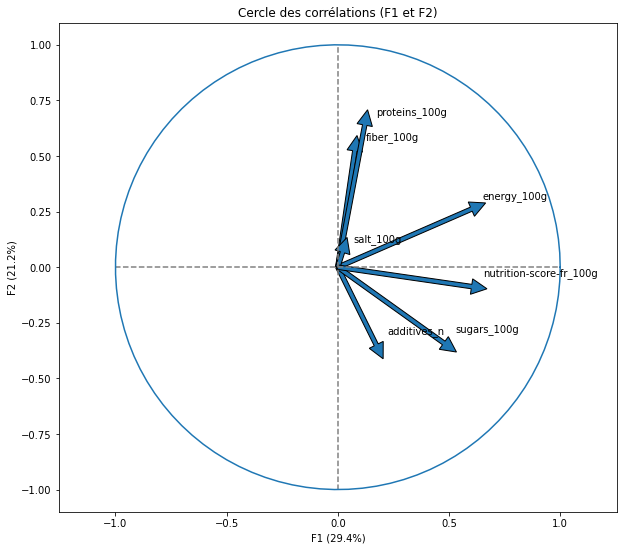

In [38]:
# Graph des corrélations sur F1 et F2
x_y = (0,1)
correlation_graph(pca, x_y, features)

En observnat ce cercle des corrélations, on constate que: 

- Les variables sugars_100g , nutrition-score-fr_100g, energy_100g sont corrélées positivement à la composantes F1 .

- Les variables proteins_100g , fiber_100g sont corrélées positivement à F2 et la variable additives_n est corrélé négativement à F2

- Les variables salt_100g ne sont pas significatif par rapport à nos composantes.

On conclut de ces observations que

La composante F1 représente la qualité énergétique d'un produit
La composantes F2 représente la saineté d'un produit pour la consommation


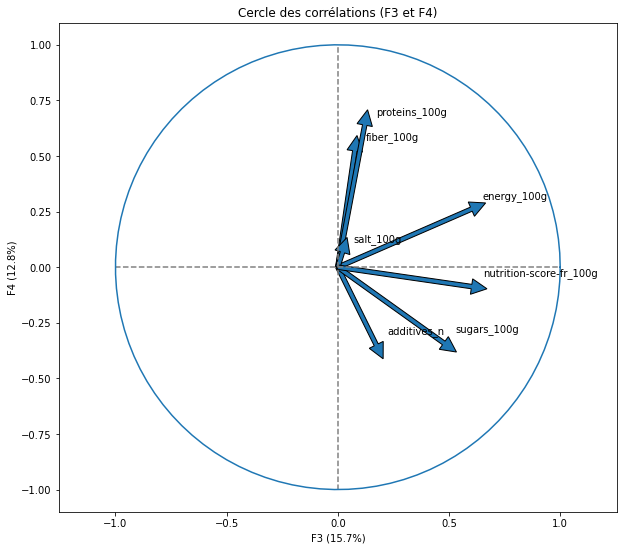

In [39]:
# Graph des corrélation entre F3 et F4
x_y = (2,3)
correlation_graph(pca, x_y, features)

Le cercles de corrélation sur les composants autres que F1 et F2 donne le même résultats que ceux-ci . Donc pour la suite de notre étude on utiliseras seulement les composantes F1 et F2

#### Projection des individus. 

On réalise maintenant la projection des individus sur le premier et le deuxième plan factoriel car Le graphique des corrélations sur les composantes (F3;F4) est le même que ceux de (F1;F2)

In [40]:
#Projection des dimensions
X_proj = pca.transform(X_scaled)
X_proj

array([[ 0.77151123,  0.27674657, -0.5425525 , ..., -0.36278118,
        -0.91283879, -0.33578177],
       [ 0.2076345 ,  1.92544991, -0.7074714 , ...,  0.12862882,
         0.60262886, -0.92708785],
       [ 0.66357612,  2.0655379 , -0.09327325, ..., -0.2222259 ,
        -0.30188941, -0.05939059],
       ...,
       [ 0.08208387,  2.90906398, -0.87523054, ...,  0.867108  ,
         0.22439118, -0.45667631],
       [-2.16817238, -0.7726931 , -0.21136842, ..., -0.46189401,
        -0.14995376,  0.44865997],
       [-2.34549768, -0.81873346, -0.2513565 , ..., -0.42718673,
        -0.11483541,  0.31016456]])

In [41]:
# FOnction de projection des individus
def display_factorial_planes(   X_projected, 
                                x_y, 
                                pca=None, 
                                labels = None,
                                clusters=None, 
                                alpha=1,
                                figsize=[10,8], 
                                marker="." ):
    """
    Affiche la projection des individus

    Positional arguments : 
    -------------------------------------
    X_projected : np.array, pd.DataFrame, list of list : la matrice des points projetés
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2

    Optional arguments : 
    -------------------------------------
    pca : sklearn.decomposition.PCA : un objet PCA qui a été fit, cela nous permettra d'afficher la variance de chaque composante, default = None
    labels : list ou tuple : les labels des individus à projeter, default = None
    clusters : list ou tuple : la liste des clusters auquel appartient chaque individu, default = None
    alpha : float in [0,1] : paramètre de transparence, 0=100% transparent, 1=0% transparent, default = 1
    figsize : list ou tuple : couple width, height qui définit la taille de la figure en inches, default = [10,8] 
    marker : str : le type de marker utilisé pour représenter les individus, points croix etc etc, default = "."
    """

    # Transforme X_projected en un df
    X_ = pd.DataFrame(X_projected)
    
    # On définit la forme de la figure si elle n'a pas été donnée
    if not figsize: 
        figsize = (7,6)

    # On vérifie la variable axis 
    if not len(x_y) ==2 : 
        raise AttributeError("2 axes sont demandées")   
    if max(x_y )>= X_.shape[1] : 
        raise AttributeError("la variable axis n'est pas bonne")   

    # On définit x et y 
    x, y = x_y

    # Initialisation de la figure       
    fig, ax = plt.subplots(1, 1, figsize=figsize)
    
    # On rajoute la color, les clusters et les labels à X_
    X_["clusters"] =  clusters if clusters is not None else "None" 
    X_["labels"] =  labels if labels is not None else "None"
    c_unique_list = X_["clusters"].sort_values().unique()
    c_dict = {j:i+1 for i, j in enumerate(c_unique_list)}
    X_["colors"] = X_["clusters"].apply(lambda i : c_dict[i])

    # Pour chaque couleur / cluster
    for c in sorted(X_.clusters.unique()) : 
        # On selectionne le sous DF
        sub_X =X_.loc[X_.clusters == c, : ]

        # Clusters and color
        cluster = sub_X.clusters.iloc[0]
        color = sub_X.colors.iloc[0]

        # On affiche les points
        ax.scatter(    sub_X.iloc[:, x], 
                        sub_X.iloc[:, y], 
                        alpha=alpha, 
                        label = cluster ,
                        cmap="Set1", 
                        marker=marker)
        
    # Si la variable pca a été fournie, on peut calculer le % de variance de chaque axe 
    if pca : 
        v1 = str(round(100*pca.explained_variance_ratio_[x]))  + " %"
        v2 = str(round(100*pca.explained_variance_ratio_[y]))  + " %"
    else : 
        v1=v2= ''

    # Nom des axes, avec le pourcentage d'inertie expliqué
    ax.set_xlabel(f'F{x+1} {v1}')
    ax.set_ylabel(f'F{y+1} {v2}')

    # Valeur x max et y max
    x_max = np.abs(X_.iloc[:, x]).max() *1.1
    y_max = np.abs(X_.iloc[:, y]).max() *1.1

    # On borne x et y 
    ax.set_xlim(left=-x_max, right=x_max)
    ax.set_ylim(bottom= -y_max, top=y_max)

    # Affichage des lignes horizontales et verticales
    plt.plot([-x_max, x_max], [0, 0], color='grey', alpha=0.8)
    plt.plot([0,0], [-y_max, y_max], color='grey', alpha=0.8)

    # Affichage des labels des points
    if labels : 
        # j'ai copié collé la fonction sans la lire
        for i,(_x,_y) in enumerate(X_[:,[x,y]]):
            plt.text(_x, _y, labels[i], fontsize='14', ha='center',va='center') 

    # Titre, legend et display
    plt.title(f"Projection des individus (sur F{x+1} et F{y+1})")
    if clusters is not None: 
        plt.legend()
    plt.show()

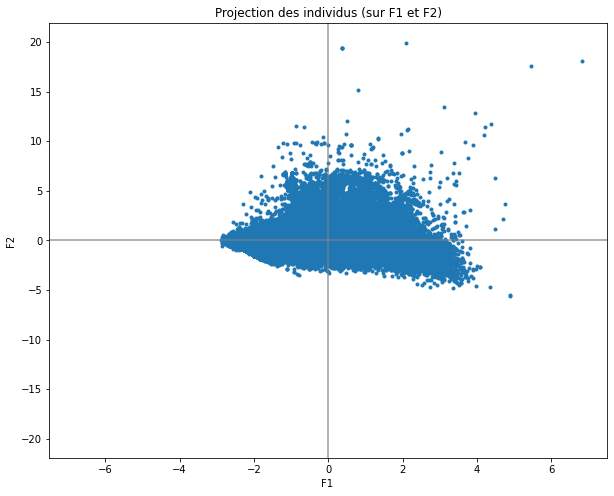

In [42]:
#Projection des individu sur le premier plan factoriel
x_y = [0,1]
display_factorial_planes(X_proj, x_y)

In [43]:
#x_y = [0,1]
#display_factorial_planes(X_proj, x_y, pca, labels=names, figsize=(20,16), marker="o")

### Test de Chi-2

Pour réaliser celà on fera le tableau de contingence et et ensuite faire le calcul  du khi2, de la pvalue et des dégré de liberté

In [44]:
#Deux variable qualitatives
X = "brands"
Y = "nutrition_grade_fr"

cont = df_OpenfoodfactsClean[[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len,margins=True,margins_name="Total").fillna(0).copy().astype(int)
cont

nutrition_grade_fr,a,b,c,d,e,Total
brands,,,,,,
"Core Meal, Core Method",1,0,0,0,0,1
"Edward and Sons, Edward & Sons",0,0,1,0,0,1
Engine 2,1,0,0,0,0,1
"Field Roast, The Field Roast Grain Meat Co.",0,0,0,0,1,1
Lotus Foods,1,0,0,0,0,1
...,...,...,...,...,...,...
"농심,Nongshim",0,0,0,1,0,1
빙그레,0,1,0,0,0,1
송학,1,0,0,0,0,1


In [45]:
khi2, pval , ddl , contingent_theorique = st.chi2_contingency(cont)

In [46]:
print('khi2: ', khi2)
print('Pvalue: ', pval)
print('dégré de liberté: ', ddl)

khi2:  319157.230302526
Pvalue:  0.0
dégré de liberté:  199775


P value nulle alors les variable [nutrition_grade_fr et additives_n] sont indépendante

In [47]:
X1 = "product_name"
Y1= "nutrition_grade_fr"

cont1 = df_OpenfoodfactsClean[[X1,Y1]].pivot_table(index=X1,columns=Y1,aggfunc=len,margins=True,margins_name="Total").fillna(0).copy().astype(int)
khi2_P, pval_P , ddl_P , contingent_theorique_P = st.chi2_contingency(cont1)
print('khi2: ', khi2_P)
print('Pvalue: ', pval_P)
print('dégré de liberté: ', ddl_P)

khi2:  767540.7321954313
Pvalue:  1.0
dégré de liberté:  802645


pvalue > 0.5 donc on accepte l'hypothèse Ho de la dépendance des variables.

Les variables sont donc dépendant

In [48]:
#Test de khi2 avec une discrétisation de la variable addictives_n

df_OpenfoodfactsClean['categories_addictive_n'] = 0
df_OpenfoodfactsClean.loc[df_OpenfoodfactsClean['additives_n'] <= 4, 'categories_addictive_n'] = '< 4'
df_OpenfoodfactsClean.loc[(df_OpenfoodfactsClean['additives_n'] > 4) & (df_OpenfoodfactsClean['additives_n'] <= 10), 'categories_addictive_n'] = '4-10'
df_OpenfoodfactsClean.loc[(df_OpenfoodfactsClean['additives_n'] > 10) & (df_OpenfoodfactsClean['additives_n'] <= 20), 'categories_addictive_n'] = '10-20'
df_OpenfoodfactsClean.loc[(df_OpenfoodfactsClean['additives_n'] > 20), 'categories_addictive_n'] = '20+'

X2 = "categories_addictive_n"
Y2= "nutrition_grade_fr"

cont2 = df_OpenfoodfactsClean[[X2,Y2]].pivot_table(index=X2,columns=Y2,aggfunc=len,margins=True,margins_name="Total").fillna(0).copy().astype(int)

khi2_Ad, pval_Ad , ddl_Ad , contingent_theorique_Ad = st.chi2_contingency(cont2)
print('khi2: ', khi2_Ad)
print('Pvalue: ', pval_Ad)
print('dégré de liberté: ', ddl_Ad)

khi2:  3555.338392431604
Pvalue:  0.0
dégré de liberté:  20


Cela nous prouve le résultat précédente que les additives et le nutrion grade reste indépendante

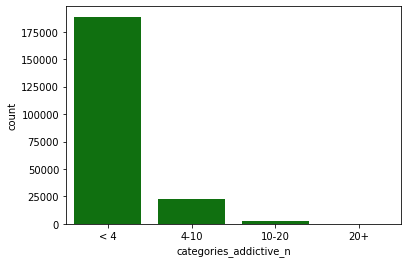

In [49]:
#On représente la répartie des individu sur la discrétisation du nombre d'additives
fig1 = sns.countplot(x = 'categories_addictive_n', data = df_OpenfoodfactsClean, color ='green')
plt.show()

In [50]:
cont2

nutrition_grade_fr,a,b,c,d,e,Total
categories_addictive_n,,,,,,
10-20,126,339,491,994,522,2472
20+,0,3,12,37,40,92
4-10,1526,2881,4750,9337,3777,22271
< 4,32757,29731,38853,50335,37062,188738
Total,34409,32954,44106,60703,41401,213573


###ANOVA

#### Réalisation de l'ANOVA

Pour faire l'anova voici les hypothèses à tenir compte:

H0 : Les moyennes de chaque groupe sont égales si p-value > 5%

H1 : Les moyennes de chaque groupe ne sont pas toutes égales < 5%

Nous validerons ici 

**L'objectif 1 : Indépendance des variables**

In [51]:
#On crée d'abord un modèle en fitant nos données
model = smf.ols('additives_n ~ nutrition_grade_fr', data = df_OpenfoodfactsClean)
res_additives = model.fit()

model1 = smf.ols('energy_100g ~ nutrition_grade_fr', data = df_OpenfoodfactsClean)
res_energy = model1.fit()

model2 = smf.ols('sugars_100g ~ nutrition_grade_fr', data = df_OpenfoodfactsClean)
res_sugars = model2.fit()

model4 = smf.ols('fiber_100g ~ nutrition_grade_fr', data = df_OpenfoodfactsClean)
res_fiber = model4.fit()

model5 = smf.ols('proteins_100g ~ nutrition_grade_fr', data = df_OpenfoodfactsClean)
res_proteins = model5.fit()

model6 = smf.ols('salt_100g ~ nutrition_grade_fr', data = df_OpenfoodfactsClean)
res_salt = model6.fit()

#On calcul l'anova
table_additives = sm.stats.anova_lm(res_additives)
table_energy = sm.stats.anova_lm(res_energy)
table_sugars = sm.stats.anova_lm(res_sugars)
table_fiber = sm.stats.anova_lm(res_fiber)
table_proteins = sm.stats.anova_lm(res_proteins)
table_salt = sm.stats.anova_lm(res_salt)

print('Anova NutritionGrade VS Addictives: ','\n' ,table_additives)
print('Anova NutritionGrade VS Energy:','\n' ,table_energy)
print('Anova NutritionGrade VS Sugars:','\n' ,table_sugars)
print('Anova NutritionGrade VS Fiber:','\n' ,table_fiber)
print('Anova NutritionGrade VS Proteins:','\n' ,table_proteins)
print('Anova NutritionGrade VS Salt: ','\n' ,table_salt)

Anova NutritionGrade VS Addictives:  
                           df        sum_sq       mean_sq           F  PR(>F)
nutrition_grade_fr       4.0  4.329364e+04  10823.410583  1927.79157     0.0
Residual            213568.0  1.199058e+06      5.614409         NaN     NaN
Anova NutritionGrade VS Energy: 
                           df        sum_sq       mean_sq             F  PR(>F)
nutrition_grade_fr       4.0  2.979372e+10  7.448429e+09  34394.890206     0.0
Residual            213568.0  4.624949e+10  2.165563e+05           NaN     NaN
Anova NutritionGrade VS Sugars: 
                           df        sum_sq       mean_sq             F  PR(>F)
nutrition_grade_fr       4.0  1.646045e+07  4.115112e+06  13112.884632     0.0
Residual            213568.0  6.702234e+07  3.138220e+02           NaN     NaN
Anova NutritionGrade VS Fiber: 
                           df        sum_sq       mean_sq           F  PR(>F)
nutrition_grade_fr       4.0  1.842920e+05  46072.992931  2698.66571     0.0
R

En observant très bien les Pvalue des différente groupe de variable sur lequel l'anova a été réalisé on constate qu'il sont tous inférieur à 5 %.
Cela permet de refuter l'hypothèse HO selon laquelle les moyennes sont toutes égales.

On déduit de l'anova donc que les moyennes ne sont pas toutes égales ainsi il y a une différences significatives entre les variables. 

Ce qui justifie l'objectif 1 qui traite de l'indépendance des variables

In [52]:
#Turkey HSD
res_turkey = sms.multicomp.pairwise_tukeyhsd(endog = df_OpenfoodfactsClean['additives_n'], groups= df_OpenfoodfactsClean['nutrition_grade_fr'] , alpha = 0.05)
res_turkey.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
a,b,0.6208,0.001,0.5709,0.6706,True
a,c,0.854,0.001,0.8075,0.9005,True
a,d,1.3435,0.001,1.2998,1.3871,True
a,e,1.0667,0.001,1.0195,1.1138,True
b,c,0.2332,0.001,0.1862,0.2803,True
b,d,0.7227,0.001,0.6785,0.7669,True
b,e,0.4459,0.001,0.3982,0.4936,True
c,d,0.4895,0.001,0.449,0.5299,True
c,e,0.2127,0.001,0.1685,0.2569,True
d,e,-0.2768,0.001,-0.318,-0.2356,True


En regardant la P-Value inférieure à 0.05 on peut affirmer qu'on peut rejeter l'hypothèse nulle (qui dit qu'il n'y aucune différence entre les paires de la variable qualitative). ALors on conclut qu'il y a une différence significatif entre les différentes des groupes de "Nutrition grade": A, B, C, D, E

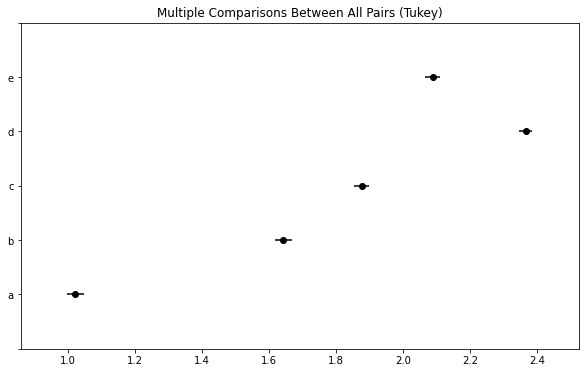

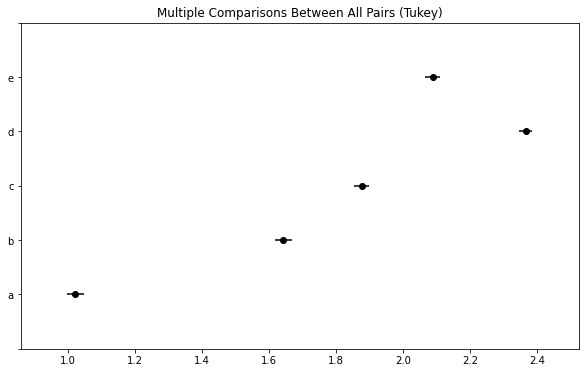

In [53]:
res_turkey.plot_simultaneous()

Nous allons ensuite calculer ne eta suare afin d'évaluer la corrélation entre les variables

In [54]:
# Fonction formule de eta_squared n^2
# x qualitative
# y quantitative

def eta_squared(x,y):
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT

print('Eta Nutrition_Grade vs Addictives: ',eta_squared(df_OpenfoodfactsClean["nutrition_grade_fr"],df_OpenfoodfactsClean['additives_n']))
print('Eta Nutrition_Grade vs Energy: ',eta_squared(df_OpenfoodfactsClean["nutrition_grade_fr"],df_OpenfoodfactsClean['energy_100g']))
print('Eta Nutrition_Grade vs Sugars: ',eta_squared(df_OpenfoodfactsClean["nutrition_grade_fr"],df_OpenfoodfactsClean['sugars_100g']))
print('Eta Nutrition_Grade vs Fiber: ',eta_squared(df_OpenfoodfactsClean["nutrition_grade_fr"],df_OpenfoodfactsClean['fiber_100g']))
print('Eta Nutrition_Grade vs Proteins: ',eta_squared(df_OpenfoodfactsClean["nutrition_grade_fr"],df_OpenfoodfactsClean['proteins_100g']))
print('Eta Nutrition_Grade vs Salt: ',eta_squared(df_OpenfoodfactsClean["nutrition_grade_fr"],df_OpenfoodfactsClean['salt_100g']))

Eta Nutrition_Grade vs Addictives:  0.034848135091171115
Eta Nutrition_Grade vs Energy:  0.39179984762178455
Eta Nutrition_Grade vs Sugars:  0.19717175219419303
Eta Nutrition_Grade vs Fiber:  0.048112563395718386
Eta Nutrition_Grade vs Proteins:  0.02829914115614119
Eta Nutrition_Grade vs Salt:  0.018520512448818822


Le coefficient eta square est très faible pour toute nos corrélation. On déduit qu'il y a une très faible corrélation entre nos variables qualitatives et quantitatives étudier

On vérifie maintenant les 3 conditions de validités de l'anova:

- L’indépendance des échantillons.

- La normalité des résidus

- L’homoscédasticité de la variance des résidus

#### Objectif 1: L’indépendance des échantillons

Ici on cherchera à vérifier la 1ère condition de validité de la l'anova qui est l'indépendance des échantillons. Elle est mise en évidence dans le tableau de l'anova où nous avons la valeur de la p-value significatif de l'indépendance des variables

#### Objectif 2 : Vérifié la normalité des résidus
Ici on vérifiera l'hypôthèse selon laquelle notre echantillon suit ou pas une loi normale.
On fera un histogram afin de voir graphiquement si les résidus de notre distribution suivent une loi normal

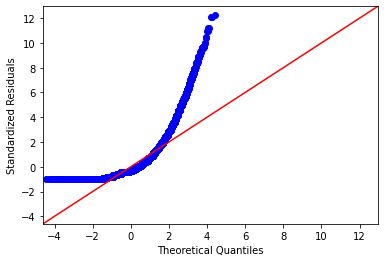

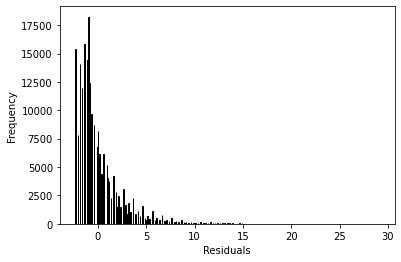

In [55]:
# Vérification de normalité pour l'anova entre Additives VS Nutrion Grade

res = stat()
res.anova_stat(df=df_OpenfoodfactsClean, res_var='additives_n', anova_model='additives_n ~ (nutrition_grade_fr)')

# res.anova_std_residuals are standardized residuals obtained from ANOVA (check above)
sm.qqplot(res.anova_std_residuals, line='45')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.show()

# histogram
plt.hist(res.anova_model_out.resid, bins='auto', histtype='bar', ec='k') 
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.show()

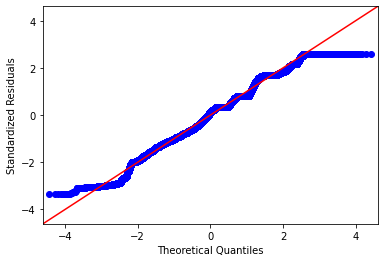

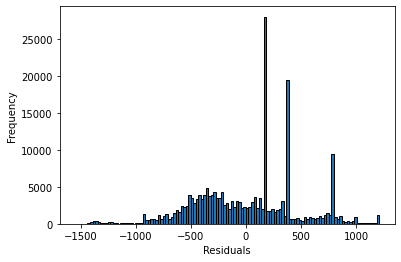

In [56]:
# Vérification de normalité pour l'anova entre Energy VS Nutrion Grade

res = stat()
res.anova_stat(df=df_OpenfoodfactsClean, res_var='energy_100g', anova_model='energy_100g ~ (nutrition_grade_fr)')

# res.anova_std_residuals are standardized residuals obtained from ANOVA (check above)
sm.qqplot(res.anova_std_residuals, line='45')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.show()

# histogram
plt.hist(res.anova_model_out.resid, bins='auto', histtype='bar', ec='k') 
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.show()

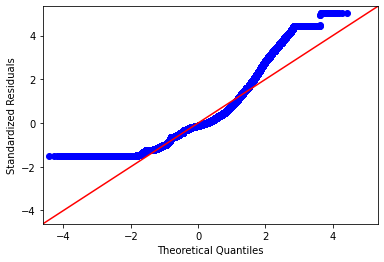

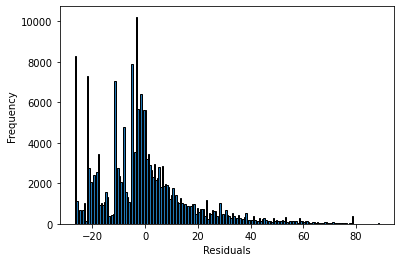

In [57]:
# Vérification de normalité pour l'anova entre Sugars VS Nutrion Grade

res = stat()
res.anova_stat(df=df_OpenfoodfactsClean, res_var='sugars_100g', anova_model='sugars_100g ~ (nutrition_grade_fr)')

# res.anova_std_residuals are standardized residuals obtained from ANOVA (check above)
sm.qqplot(res.anova_std_residuals, line='45')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.show()

# histogram
plt.hist(res.anova_model_out.resid, bins='auto', histtype='bar', ec='k') 
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.show()

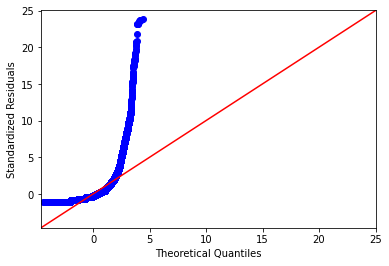

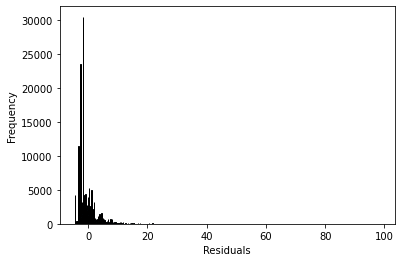

In [58]:
# Vérification de normalité pour l'anova entre Fibre VS Nutrion Grade

res = stat()
res.anova_stat(df=df_OpenfoodfactsClean, res_var='fiber_100g', anova_model='fiber_100g ~ (nutrition_grade_fr)')

# res.anova_std_residuals are standardized residuals obtained from ANOVA
sm.qqplot(res.anova_std_residuals, line='45')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.show()

# histogram
plt.hist(res.anova_model_out.resid, bins='auto', histtype='bar', ec='k') 
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.show()

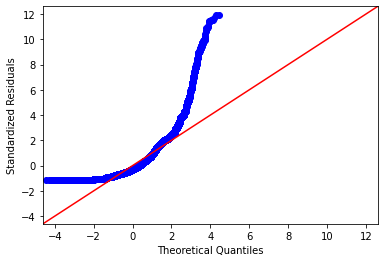

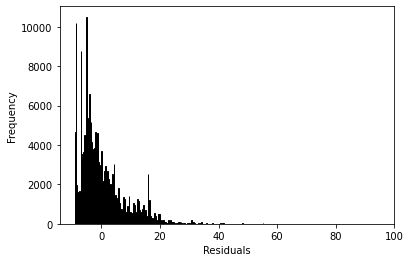

In [59]:
# Vérification de normalité pour l'anova entre Proteins VS Nutrion Grade

res = stat()
res.anova_stat(df=df_OpenfoodfactsClean, res_var='proteins_100g', anova_model='proteins_100g ~ (nutrition_grade_fr)')

# res.anova_std_residuals are standardized residuals obtained from ANOVA (check above)
sm.qqplot(res.anova_std_residuals, line='45')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.show()

# histogram
plt.hist(res.anova_model_out.resid, bins='auto', histtype='bar', ec='k') 
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.show()

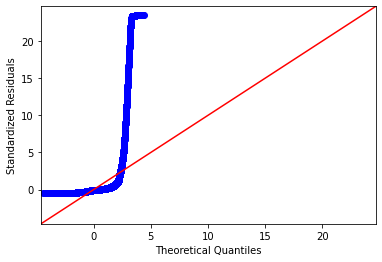

In [60]:
# Vérification de normalité pour l'anova entre Salt VS Nutrion Grade

res = stat()
res.anova_stat(df=df_OpenfoodfactsClean, res_var='salt_100g', anova_model='salt_100g ~ (nutrition_grade_fr)')

# res.anova_std_residuals are standardized residuals obtained from ANOVA (check above)
sm.qqplot(res.anova_std_residuals, line='45')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.show()


L’objectif est de s’assurer que les résidus suivent une loi normale afin de ne pas affirmer qu’il existe une différence de moyenne entre les groupes qui serait causée par le hasard.

On utilise le test de Shapiro-Wilk pour tester la normalité des résidus où :

H0 : Les résidus suivent une loi normale si p-value > 5%

H1 : Les résidus ne suivent pas une loi normale si p-value < 5%

In [61]:
print('Test Shapiro pour (NutritionGrade VS Addictives) :', st.shapiro(res_additives.resid),'\n')
print('Test Shapiro pour (NutritionGrade VS Energy) :', st.shapiro(res_energy.resid),'\n')
print('Test Shapiro pour (NutritionGrade VS Sugars) :', st.shapiro(res_sugars.resid),'\n')
print('Test Shapiro pour (NutritionGrade VS Fiber) :', st.shapiro(res_fiber.resid),'\n')
print('Test Shapiro pour (NutritionGrade VS Proteins) :', st.shapiro(res_proteins.resid),'\n')
print('Test Shapiro pour (NutritionGrade VS Salt) :', st.shapiro(res_salt.resid),'\n')

Test Shapiro pour (NutritionGrade VS Addictives) : ShapiroResult(statistic=0.7779942750930786, pvalue=0.0) 

Test Shapiro pour (NutritionGrade VS Energy) : ShapiroResult(statistic=0.9883052110671997, pvalue=0.0) 

Test Shapiro pour (NutritionGrade VS Sugars) : ShapiroResult(statistic=0.9118243455886841, pvalue=0.0) 

Test Shapiro pour (NutritionGrade VS Fiber) : ShapiroResult(statistic=0.6448383927345276, pvalue=0.0) 

Test Shapiro pour (NutritionGrade VS Proteins) : ShapiroResult(statistic=0.8404664397239685, pvalue=0.0) 

Test Shapiro pour (NutritionGrade VS Salt) : ShapiroResult(statistic=0.209028959274292, pvalue=0.0) 



/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


La pvalue étant nulle, ON rejete donc l'hypothèse de normalité des résidus.Etant donné que cette méthode n'est pas très qualitatif lorsqu'on n'a plus de 5000 individus elle nous sert juste à confirmer nos observations faite précédemment

#### Objectif 3: Homoscédasité des variances des résidus

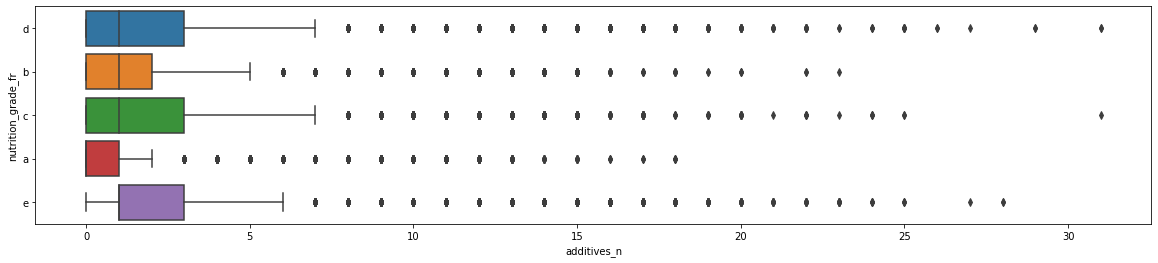

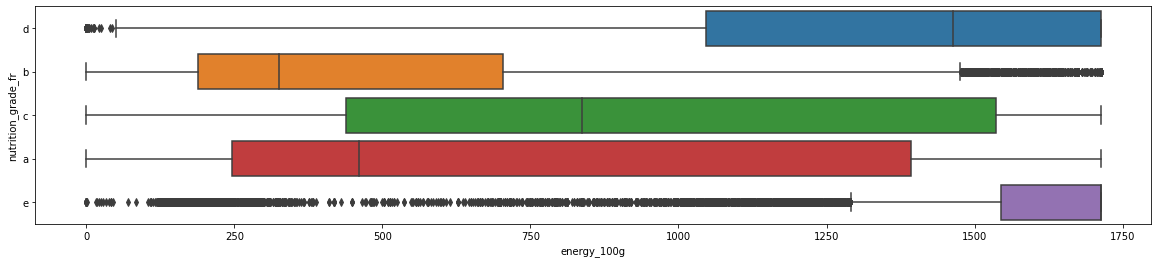

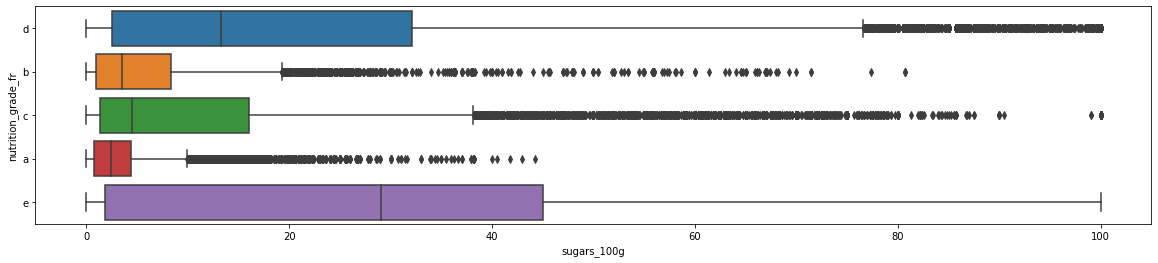

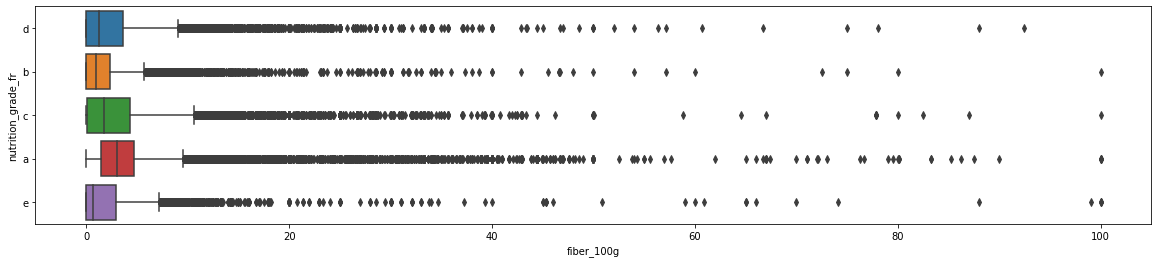

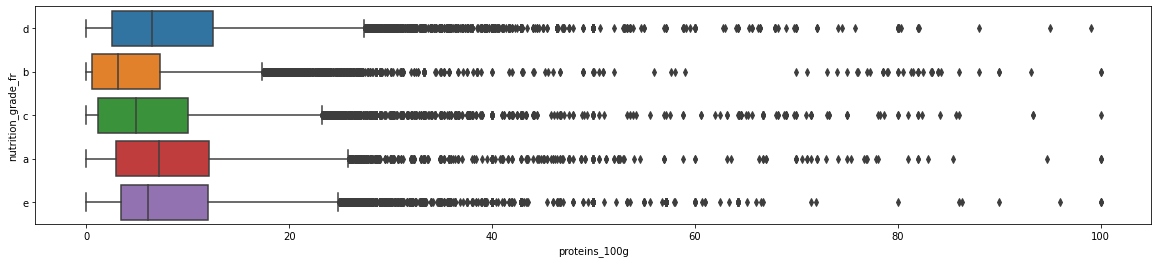

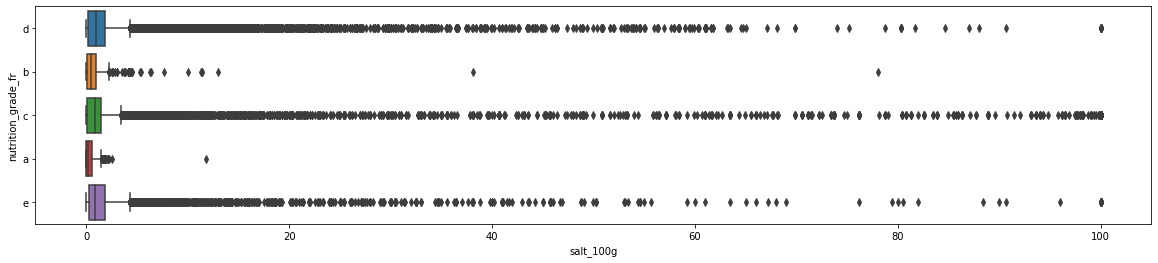

In [62]:
plt.subplots(figsize=(20,4))
ax = sns.boxplot(x="additives_n", y="nutrition_grade_fr", data=df_OpenfoodfactsClean)

plt.subplots(figsize=(20,4))
ax = sns.boxplot(x="energy_100g", y="nutrition_grade_fr", data=df_OpenfoodfactsClean)

plt.subplots(figsize=(20,4))
ax = sns.boxplot(x="sugars_100g", y="nutrition_grade_fr", data=df_OpenfoodfactsClean)

plt.subplots(figsize=(20,4))
ax = sns.boxplot(x="fiber_100g", y="nutrition_grade_fr", data=df_OpenfoodfactsClean)

plt.subplots(figsize=(20,4))
ax = sns.boxplot(x="proteins_100g", y="nutrition_grade_fr", data=df_OpenfoodfactsClean)

plt.subplots(figsize=(20,4))
ax = sns.boxplot(x="salt_100g", y="nutrition_grade_fr", data=df_OpenfoodfactsClean)

In [63]:
df_OpenfoodfactsClean.groupby("nutrition_grade_fr")['additives_n'].agg('var')
df_OpenfoodfactsClean.groupby("nutrition_grade_fr")['energy_100g'].agg('var')

nutrition_grade_fr
a    303701.901906
b    202402.328093
c    321352.425187
d    166930.460222
e    116514.236845
Name: energy_100g, dtype: float64

Mais c’est le test de bartlett qui permet de tester si les variances sont significativement différentes ou non avec :

H0 : Les variances de chaque groupe sont égales si p-value > 5%

H1 : Les variances de chaque groupe ne sont pas toutes égales < 5%

In [64]:
print('Additives & NutritionGrade: ',st.bartlett(df_OpenfoodfactsClean.additives_n[df_OpenfoodfactsClean.nutrition_grade_fr == 'a'],
        df_OpenfoodfactsClean.additives_n[df_OpenfoodfactsClean.nutrition_grade_fr == 'b'],
        df_OpenfoodfactsClean.additives_n[df_OpenfoodfactsClean.nutrition_grade_fr == 'c'],
        df_OpenfoodfactsClean.additives_n[df_OpenfoodfactsClean.nutrition_grade_fr == 'd'],
        df_OpenfoodfactsClean.additives_n[df_OpenfoodfactsClean.nutrition_grade_fr == 'e']))

print('Energy & NutritionGrade: ',st.bartlett(df_OpenfoodfactsClean.energy_100g[df_OpenfoodfactsClean.nutrition_grade_fr == 'a'],
        df_OpenfoodfactsClean.energy_100g[df_OpenfoodfactsClean.nutrition_grade_fr == 'b'],
        df_OpenfoodfactsClean.energy_100g[df_OpenfoodfactsClean.nutrition_grade_fr == 'c'],
        df_OpenfoodfactsClean.energy_100g[df_OpenfoodfactsClean.nutrition_grade_fr == 'd'],
        df_OpenfoodfactsClean.energy_100g[df_OpenfoodfactsClean.nutrition_grade_fr == 'e']))

print('Sugars & NutritionGrade: ',st.bartlett(df_OpenfoodfactsClean.sugars_100g[df_OpenfoodfactsClean.nutrition_grade_fr == 'a'],
        df_OpenfoodfactsClean.sugars_100g[df_OpenfoodfactsClean.nutrition_grade_fr == 'b'],
        df_OpenfoodfactsClean.sugars_100g[df_OpenfoodfactsClean.nutrition_grade_fr == 'c'],
        df_OpenfoodfactsClean.sugars_100g[df_OpenfoodfactsClean.nutrition_grade_fr == 'd'],
        df_OpenfoodfactsClean.sugars_100g[df_OpenfoodfactsClean.nutrition_grade_fr == 'e']))

print('Fiber & NutritionGrade: ',st.bartlett(df_OpenfoodfactsClean.fiber_100g[df_OpenfoodfactsClean.nutrition_grade_fr == 'a'],
        df_OpenfoodfactsClean.fiber_100g[df_OpenfoodfactsClean.nutrition_grade_fr == 'b'],
        df_OpenfoodfactsClean.fiber_100g[df_OpenfoodfactsClean.nutrition_grade_fr == 'c'],
        df_OpenfoodfactsClean.fiber_100g[df_OpenfoodfactsClean.nutrition_grade_fr == 'd'],
        df_OpenfoodfactsClean.fiber_100g[df_OpenfoodfactsClean.nutrition_grade_fr == 'e']))

print('Proteins & NutritionGrade: ',st.bartlett(df_OpenfoodfactsClean.proteins_100g[df_OpenfoodfactsClean.nutrition_grade_fr == 'a'],
        df_OpenfoodfactsClean.proteins_100g[df_OpenfoodfactsClean.nutrition_grade_fr == 'b'],
        df_OpenfoodfactsClean.proteins_100g[df_OpenfoodfactsClean.nutrition_grade_fr == 'c'],
        df_OpenfoodfactsClean.proteins_100g[df_OpenfoodfactsClean.nutrition_grade_fr == 'd'],
        df_OpenfoodfactsClean.proteins_100g[df_OpenfoodfactsClean.nutrition_grade_fr == 'e']))

print('Salt & NutritionGrade: ',st.bartlett(df_OpenfoodfactsClean.salt_100g[df_OpenfoodfactsClean.nutrition_grade_fr == 'a'],
        df_OpenfoodfactsClean.salt_100g[df_OpenfoodfactsClean.nutrition_grade_fr == 'b'],
        df_OpenfoodfactsClean.salt_100g[df_OpenfoodfactsClean.nutrition_grade_fr == 'c'],
        df_OpenfoodfactsClean.salt_100g[df_OpenfoodfactsClean.nutrition_grade_fr == 'd'],
        df_OpenfoodfactsClean.salt_100g[df_OpenfoodfactsClean.nutrition_grade_fr == 'e']))

Additives & NutritionGrade:  BartlettResult(statistic=9017.212962783866, pvalue=0.0)
Energy & NutritionGrade:  BartlettResult(statistic=14643.227499994331, pvalue=0.0)
Sugars & NutritionGrade:  BartlettResult(statistic=132602.75575269185, pvalue=0.0)
Fiber & NutritionGrade:  BartlettResult(statistic=32663.635237575352, pvalue=0.0)
Proteins & NutritionGrade:  BartlettResult(statistic=5655.520225519479, pvalue=0.0)
Salt & NutritionGrade:  BartlettResult(statistic=253682.17434341757, pvalue=0.0)


Les p-value étant inférieur à 0,5 les variances ne sont pas égales.

Nous allons réalisé le Test de Leveness pour confirmer cela

In [65]:
res = stat()
res.levene(df=df_OpenfoodfactsClean, res_var='additives_n', xfac_var='nutrition_grade_fr')
res.levene_summary

,Parameter,Value
0,Test statistics (W),959.9053
1,Degrees of freedom (Df),4.0000
2,p value,0.0000


In [66]:
res.levene(df=df_OpenfoodfactsClean, res_var='energy_100g', xfac_var='nutrition_grade_fr')
res.levene_summary

,Parameter,Value
0,Test statistics (W),7141.3019
1,Degrees of freedom (Df),4.0000
2,p value,0.0000


In [67]:
res.levene(df=df_OpenfoodfactsClean, res_var='sugars_100g', xfac_var='nutrition_grade_fr')
res.levene_summary

,Parameter,Value
0,Test statistics (W),17181.2007
1,Degrees of freedom (Df),4.0000
2,p value,0.0000


In [68]:
res.levene(df=df_OpenfoodfactsClean, res_var='fiber_100g', xfac_var='nutrition_grade_fr')
res.levene_summary

,Parameter,Value
0,Test statistics (W),1267.8778
1,Degrees of freedom (Df),4.0000
2,p value,0.0000


In [69]:
res.levene(df=df_OpenfoodfactsClean, res_var='proteins_100g', xfac_var='nutrition_grade_fr')
res.levene_summary

,Parameter,Value
0,Test statistics (W),662.9353
1,Degrees of freedom (Df),4.0000
2,p value,0.0000


In [70]:
res.levene(df=df_OpenfoodfactsClean, res_var='salt_100g', xfac_var='nutrition_grade_fr')
res.levene_summary

,Parameter,Value
0,Test statistics (W),715.3427
1,Degrees of freedom (Df),4.0000
2,p value,0.0000


En observant le test de Leveness pour chaque étude de variances on constate que les p-value est inférieur à 0,5 ce qui confirme notre affirmation selon laquelle nous rejetons l'hypothèse d'égalité des variances

On en conclut que les variances ne sont pas toutes égales

# Conclusion

Notre application est pertinente et réalisable selon les données que nous disposons. 

Le seule problème dans notre application serait au niveau des catégories des produits qui ne sont pas au départ renseigné. Mais il y a la possibilité de mettre en place un algorithme pour calculer selon la composition d'un produit à quel catégorie ce produit appartient.